产品销售数据统计分析

In [1]:
# 读取并查看数据信息
import pandas as pd
df = pd.read_csv(r'D:\Analysis\Practice1\customer_shopping_data.csv')
print(df.shape)     
print(df.columns)   # 数据中一共有99457条记录，9个特征

(99457, 9)
Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date'],
      dtype='object')


In [8]:
pd.set_option('display.unicode.east_asian_width',True)
pd.set_option('display.width',10000)
pd.set_option('display.max_columns',1000)
print(df.head())
print(df.tail())

  invoice_no customer_id  gender  age  category  quantity    price payment_method invoice_date  total_sales
0    I138884     C241288  Female   28  Clothing         5  1500.40         Alipay     5/8/2022      7502.00
1    I317333     C111565    Male   21     Shoes         3  1800.51     WeChat Pay   12/12/2021      5401.53
2    I127801     C266599    Male   20  Clothing         1   300.08           Card    9/11/2021       300.08
3    I173702     C988172  Female   66     Shoes         5  3000.85         Alipay   16/05/2021     15004.25
4    I337046     C189076  Female   53     Books         4    60.60           Card   24/10/2021       242.40
      invoice_no customer_id  gender  age         category  quantity    price payment_method invoice_date  total_sales
99452    I219422     C441542  Female   45         Souvenir         5    58.65         Alipay   21/09/2022       293.25
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46           Card   22/09/2021        2

In [3]:
# 缺失性分析
print(df.info())   # 可以看出，数据中并没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB
None


In [4]:
# 描述性统计分析
print(df.describe().T)  #可以看出顾客的平均年龄在43岁左右，购买的商品平均价格为689元，但商品价格差距较大，最大值与最小值相差超过5000元

            count        mean         std    min    25%    50%      75%     max
age       99457.0   43.427089   14.990054  18.00  30.00   43.0    56.00    69.0
quantity  99457.0    3.003429    1.413025   1.00   2.00    3.0     4.00     5.0
price     99457.0  689.256321  941.184567   5.23  45.45  203.3  1200.32  5250.0


In [38]:
# 年销售额变化趋势分析 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei',]   #解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False   # 解决负号显示异常

# print(df['invoice_date'].dtypes)  # 需要将invoice_date转换为时间格式
df['invoice_date']=pd.to_datetime(df['invoice_date'],dayfirst=True)
Trend_df=df[['invoice_date','quantity','price']]
Trend_df1=Trend_df.sort_values(by=['invoice_date']).set_index('invoice_date')
Trend_df2=Trend_df1.resample('YE').sum().to_period('Y')
Trend_df3=Trend_df2[Trend_df2.index.year!=2023]
print(Trend_df3)

              quantity        price
invoice_date                       
2021            136096  31316304.63
2022            137147  31372826.18


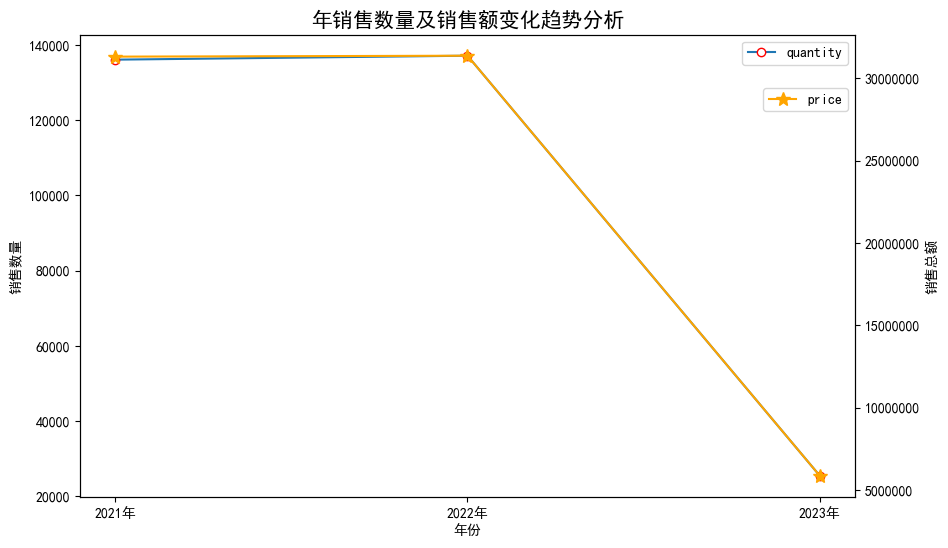

In [ ]:
year=['2021年','2022年','2023年']
x=range(len(year))
y1=Trend_df2['quantity']
y2=Trend_df2['price']
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
plt.xticks(x,labels=year)
plt.xlabel('年份')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.plot(x,y1,marker='o',mec='r',mfc='w',label='quantity')
ax1.set_ylabel('销售数量')
ax1.legend(loc='upper right',bbox_to_anchor=(1,1))
ax2=ax1.twinx()
ax2.plot(x,y2,color='orange',marker='*',ms=10,label='price')
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.set_ylabel('销售总额')
ax2.legend(loc='upper right',bbox_to_anchor=(1,0.9))
plt.title('年销售数量及销售额变化趋势分析',fontsize=15)
plt.show()

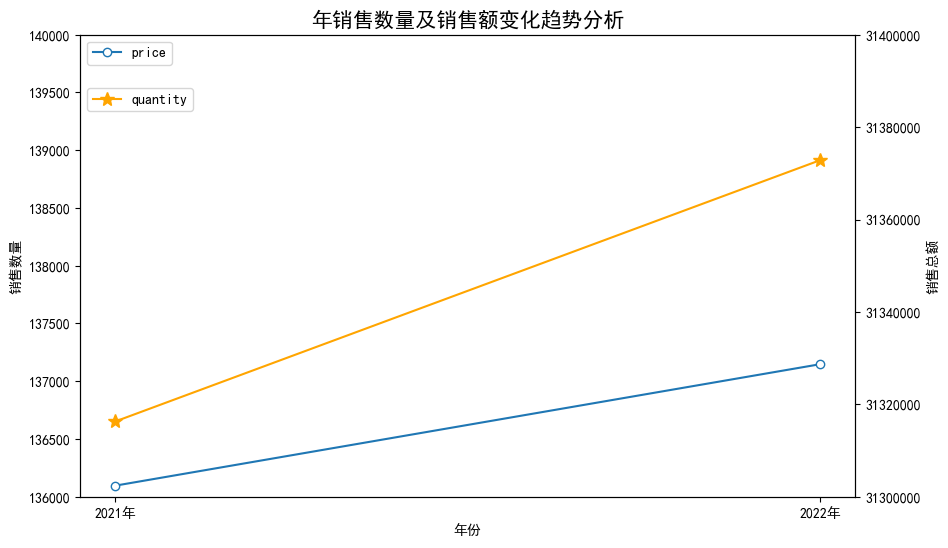

In [ ]:
year=['2021年','2022年']
x=range(len(year))
y1=Trend_df3['quantity']
y2=Trend_df3['price']
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
plt.xticks(x,labels=year)
plt.xlabel('年份')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.plot(x,y1,marker='o',mfc='w',label=u'price')
ax1.set_ylabel('销售数量')
ax1.set_ylim(136000,140000)
ax1.legend(loc=2)
ax2=ax1.twinx()
ax2.plot(x,y2,color='orange',marker='*',ms=10,label=u'quantity')
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.set_ylabel('销售总额')
ax2.set_ylim(31300000,31400000)
ax2.legend(loc=2,bbox_to_anchor=(0,0.9))
plt.title('年销售数量及销售额变化趋势分析',fontsize=15)
plt.show()

从图中可以看出，2021年和2022年的销售数量和销售总额相差不大。具体来看，销售数量相差1051，销售总额相差56521元，销售数量和销售总额呈现稳定增长的趋势。2023年的数据仅包含前几个月，因此销售数量和销售总额较低，预计未来也将持续增长。

In [ ]:
# 2022年各月销售趋势分析
Trend_df3=Trend_df1[Trend_df1.index.year==2022]
Trend_df4=Trend_df3.resample('ME').sum().to_period('M')
print(Trend_df4)

              quantity       price
invoice_date                      
2022-01          11619  2656149.96
2022-02          10248  2318201.08
2022-03          11949  2705190.76
2022-04          11288  2543653.14
2022-05          11597  2684556.89
2022-06          11322  2613106.01
2022-07          11713  2749554.99
2022-08          11716  2638238.71
2022-09          11197  2584908.39
2022-10          11766  2755839.69
2022-11          11231  2447988.76
2022-12          11501  2675437.80


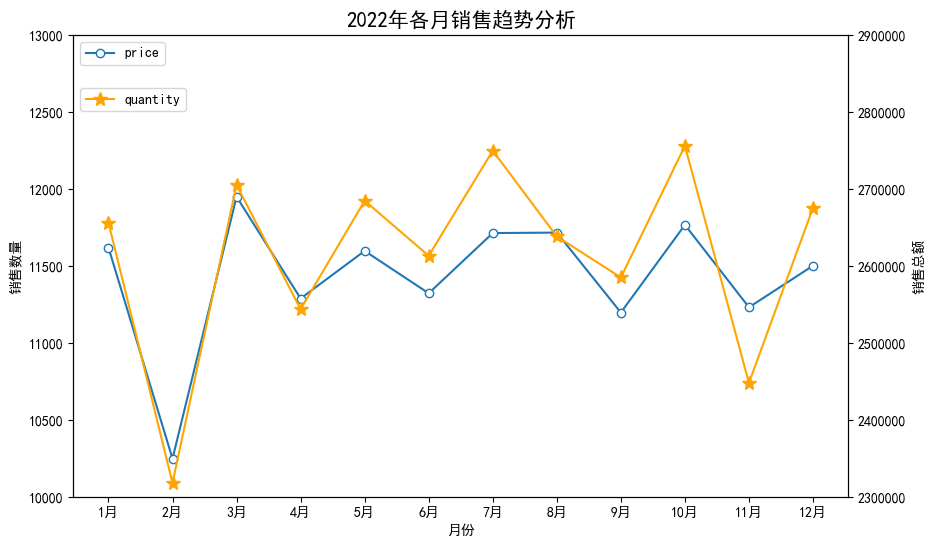

In [ ]:
month=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
x=range(len(month))
y1=Trend_df4['quantity']
y2=Trend_df4['price']
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
plt.xticks(x,labels=month)
plt.xlabel('月份')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.plot(x,y1,marker='o',mfc='w',label=u'price')
ax1.set_ylabel('销售数量')
ax1.set_ylim(10000,13000)
ax1.legend(loc=2)
ax2=ax1.twinx()
ax2.plot(x,y2,color='orange',marker='*',ms=10,label=u'quantity')
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.set_ylim(2300000,2900000)
ax2.set_ylabel('销售总额')
ax2.legend(loc=2,bbox_to_anchor=(0,0.9))
plt.title('2022年各月销售趋势分析',fontsize=15)
plt.show()

图中展示了2022年各月的销售数量和销售总额的变化趋势。可以看出，销售数量和销售总额在各个月份之间存在一定的波动，但总体趋势较为稳定。2月的销售数量和销售总额较低，可能是由于该月天数较少所致，也可能是因春节期间快递停运而导致的销售量减少。同时，天数为31的月份的销售数量和销售金额比其他月份稍高。接下来需要通过计算日销售额来判断是否是天数多少导致销售数量和销售额的变化，比较历史同期数据，判断数据是否有异常，再进一步研究是否有季节性因素和活动的影响。

In [ ]:
# 2021年各月销售趋势分析
Trend_df5=Trend_df1[Trend_df1.index.year==2021]
Trend_df6=Trend_df5.resample('ME').sum().to_period('M')
print(Trend_df6)

              quantity       price
invoice_date                      
2021-01          11483  2656422.78
2021-02          10179  2358636.34
2021-03          11383  2618434.14
2021-04          11270  2558825.62
2021-05          11620  2662369.93
2021-06          11352  2547239.73
2021-07          11986  2802468.58
2021-08          11205  2632303.32
2021-09          10901  2530305.88
2021-10          11711  2782418.40
2021-11          11355  2547152.35
2021-12          11651  2619727.56


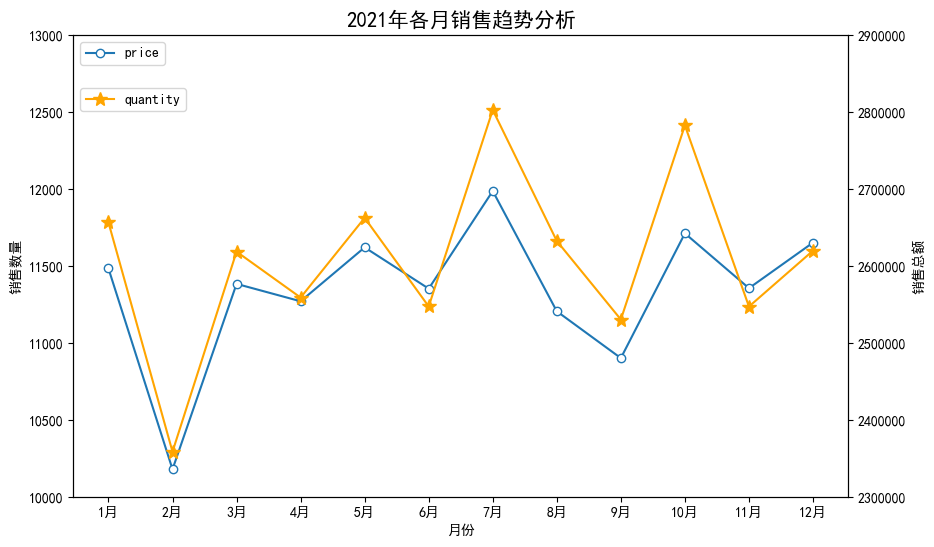

In [ ]:
month=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
x=range(len(month))
y1=Trend_df6['quantity']
y2=Trend_df6['price']
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
plt.xticks(x,labels=month)
plt.xlabel('月份')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.set_ylim(10000,13000)
ax1.plot(x,y1,marker='o',mfc='w',label=u'price')
ax1.set_ylabel('销售数量')
ax1.legend(loc=2)
ax2=ax1.twinx()
ax2.plot(x,y2,color='orange',marker='*',ms=10,label=u'quantity')
ax2.set_ylim(2300000,2900000)
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.set_ylabel('销售总额')
ax2.legend(loc=2,bbox_to_anchor=(0,0.9))
plt.title('2021年各月销售趋势分析',fontsize=15)
plt.show()

C:\Users\Qin Wang\AppData\Local\Temp\ipykernel_10216\1905959901.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y1=Trend_df1[Trend_df1.index.year==2021].resample('M').sum().to_period('M')['quantity']
C:\Users\Qin Wang\AppData\Local\Temp\ipykernel_10216\1905959901.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y2=Trend_df1[Trend_df1.index.year==2022].resample('M').sum().to_period('M')['quantity']
C:\Users\Qin Wang\AppData\Local\Temp\ipykernel_10216\1905959901.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y3=Trend_df1[Trend_df1.index.year==2023].resample('M').sum().to_period('M')['quantity']


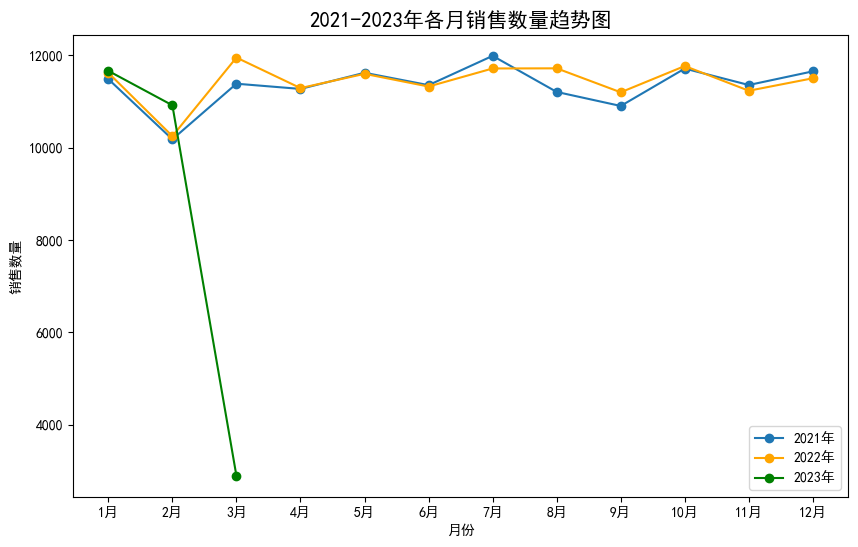

In [ ]:
y1=Trend_df1[Trend_df1.index.year==2021].resample('M').sum().to_period('M')['quantity']
y2=Trend_df1[Trend_df1.index.year==2022].resample('M').sum().to_period('M')['quantity']
y3=Trend_df1[Trend_df1.index.year==2023].resample('M').sum().to_period('M')['quantity']
month_partial=['1月','2月','3月']
x_partial=range(len(month_partial))
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
plt.xticks(x,labels=month)
plt.xlabel('月份')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.plot(x,y1,marker='o',label='2021年')
ax1.set_ylabel('销售数量')
ax1.legend(loc='lower right')
ax1.plot(x,y2,marker='o',color='orange',label='2022年')
ax1.legend(loc='lower right')
ax1.plot(x_partial,y3,marker='o',color='green',label='2023年')
ax1.legend(loc='lower right')
plt.title('2021-2023年各月销售数量趋势图',fontsize=15)
plt.show()

图中展示了2021年、2022年和2023年前三个月的销售数量变化趋势。可以看出，2022年各月的销售数量较高于2021年各月的销售数量，在10000-12000区间波动，而从2023年前两个月的销售数据可以发现，2023年的销售数量将高于2022年，整体呈现上升趋势。

In [ ]:
# 品类战略分析（ABC分类法）
# 销售收入和累计贡献率分析
import numpy as np
ABC_df=df[['category','quantity','price']]
ABC_df1=ABC_df.groupby('category').sum().reset_index()
ABC_df1=ABC_df1.set_index('category').sort_values(by='price',ascending=False)
ABC_df1['累计贡献率']=(ABC_df1['price'].cumsum()/ABC_df1['price'].sum()).round(2)
print(ABC_df1.head())

            quantity        price  累计贡献率
category                                     
Clothing      103558  31075684.64        0.45
Shoes          30217  18135336.89        0.72
Technology     15021  15772050.00        0.95
Cosmetics      45465   1848606.90        0.97
Toys           30321   1086704.64        0.99


In [ ]:
# 使用cut函数将数据分为A、B、C三类
ABC_df1['商品类别']=pd.cut(ABC_df1['累计贡献率'],[0,0.8,0.95,1],labels=['A类','B类','c类'])
print(ABC_df1.head())

            quantity        price  累计贡献率 商品类别
category                                              
Clothing      103558  31075684.64        0.45      A类
Shoes          30217  18135336.89        0.72      A类
Technology     15021  15772050.00        0.95      B类
Cosmetics      45465   1848606.90        0.97      c类
Toys           30321   1086704.64        0.99      c类


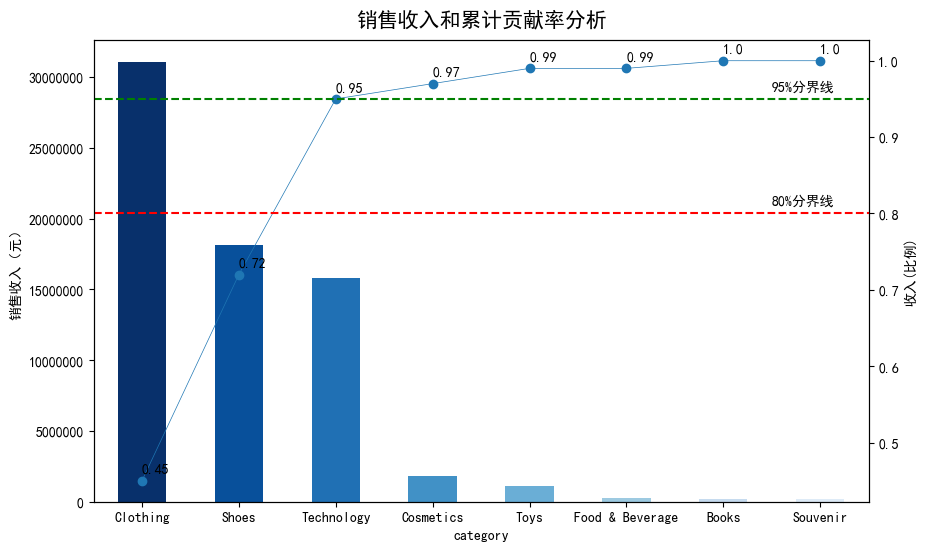

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
colors=plt.colormaps['Blues'](1-np.arange(len(ABC_df1))/len(ABC_df1))
ABC_df1['price'].plot(kind='bar',color=colors)
plt.ylabel('销售收入（元）',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
p=ABC_df1['累计贡献率']
p.plot(secondary_y=True,style='-o',linewidth=0.5)
for a in range(p.shape[0]):
    plt.annotate(format(p.iloc[a],'2'),xy=(a,p.iloc[a]),xytext=(a,p.iloc[a]+0.01),fontsize=10)
plt.ylabel(u'收入(比例)',fontsize=10)
plt.axhline(0.8,color='red',linestyle='--')
plt.axhline(0.95,color='green',linestyle='--')
plt.text(x=len(ABC_df1)-1.5,y=0.81,s='80%分界线',fontsize=10)
plt.text(x=len(ABC_df1)-1.5,y=0.96,s='95%分界线',fontsize=10)
plt.title('销售收入和累计贡献率分析',fontsize=15,pad='10')
plt.show()

图中展示了各品类的销售收入和累计贡献率。可以看出，Clothing 品类的销售收入最高，贡献率也最高，Shoes品类次之。Clothing品类和Shoes品类都是A类产品，需要保证其库存充足，并加大推广力度。对于Cosmetics、Toys等C类产品，则需考虑降低库存水平，淘汰部分过时产品。

In [ ]:
# 热销单品环比同比增长情况
import matplotlib.ticker as mtick
MOM_df=df[df['category']=='Clothing'][['invoice_date','quantity']]
MOM_df1=MOM_df.set_index('invoice_date').sort_values(by=['invoice_date']).resample('M').sum().to_period('M')
print(MOM_df1.head())


              quantity
invoice_date          
2021-01           3947
2021-02           3565
2021-03           4100
2021-04           4143
2021-05           3974


C:\Users\Qin Wang\AppData\Local\Temp\ipykernel_10216\3991437807.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  MOM_df1=MOM_df.set_index('invoice_date').sort_values(by=['invoice_date']).resample('M').sum().to_period('M')


In [ ]:
MOM_df1['quantity']=MOM_df1.sum(axis=1)
MOM_df1['rate']=((MOM_df1['quantity']-MOM_df1['quantity'].shift(1))/MOM_df1['quantity'])*100
MOM_df1['同比增长率']=MOM_df1['quantity'].pct_change(periods=12)*100
print(MOM_df1.head())

              quantity       rate  同比增长率
invoice_date                                 
2021-01           3947        NaN         NaN
2021-02           3565 -10.715288         NaN
2021-03           4100  13.048780         NaN
2021-04           4143   1.037895         NaN
2021-05           3974  -4.252642         NaN


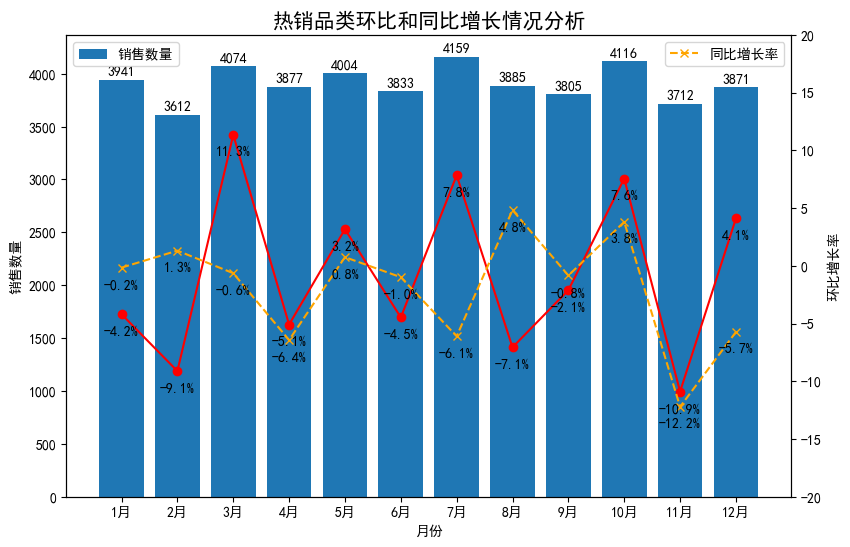

In [ ]:
MOM_df2=MOM_df1[MOM_df1.index.year==2022]
month=['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
x=range(len(month))
y1=MOM_df2['quantity']
y2=MOM_df2['rate']
y3=MOM_df2['同比增长率']
fig=plt.figure(figsize=(10,6))
plt.rcParams['axes.unicode_minus']=False
ax1=fig.add_subplot(111)
plt.title('热销品类环比和同比增长情况分析',fontsize=15)
plt.xticks(x,labels=month)
plt.xlabel('月份')
ax1.bar(x,y1,label='销售数量')
ax1.set_ylabel('销售数量')
for a,b in zip(x,y1):
    plt.text(a,b+20,b,ha='center',va='bottom',fontsize=10)
ax2=ax1.twinx()
ax2.plot(x,y2,color='r',linestyle='-',marker='o')
fmt='%.1f%%'
yticks=mtick.FormatStrFormatter(fmt)
ax2.set_ylim(-20,20)
ax2.set_ylabel('环比增长率')
ax2.plot(x,y3,color='orange',linestyle='--',marker='x',label='同比增长率')
for a,b in zip(x,y2):
    plt.text(a,b-2,fmt%b,ha='center',va='bottom',fontsize=10)
for a,b in zip(x,y3):
    plt.text(a,b-2,fmt%b,ha='center',va='bottom',fontsize=10)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')    
plt.subplots_adjust(right=0.85)
plt.show()

使用ABC分类法得到热销品类中第一位的是Clothing，因此对Clothing品类的环比和同比增长率进行分析。通过分析2022年各月Clothing品类销售数量的环比和同比，可以全面了解各月的销售数量波动情况，并对不同年份之间销售数量的变化有一个较为直观的了解。
可以看出，2022年各月Clothing品类的销售数量在3500-4000区间内，环比增长情况有隔月增加的波动趋势，总体较为稳定。相较于2021年各月，2月的销售数量增加幅度最明显，同比增加了11.3%；10月的销售数量减少幅度最明显，同比降低了12.2%，后期需要按照“提出问题-分析原因-提出建议”的逻辑对该问题进行分析。

In [ ]:
# 不同渠道用户占比
df['customer_channel']=df['customer_id'].str[:2]
pd.set_option('display.unicode.east_asian_width',True)
pd.set_option('display.width',10000)
pd.set_option('display.max_columns',1000)
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price payment_method invoice_date customer_channel
0    I138884     C241288  Female   28  Clothing         5  1500.40         Alipay   2022-08-05               C2
1    I317333     C111565    Male   21     Shoes         3  1800.51     WeChat Pay   2021-12-12               C1
2    I127801     C266599    Male   20  Clothing         1   300.08           Card   2021-11-09               C2
3    I173702     C988172  Female   66     Shoes         5  3000.85         Alipay   2021-05-16               C9
4    I337046     C189076  Female   53     Books         4    60.60           Card   2021-10-24               C1


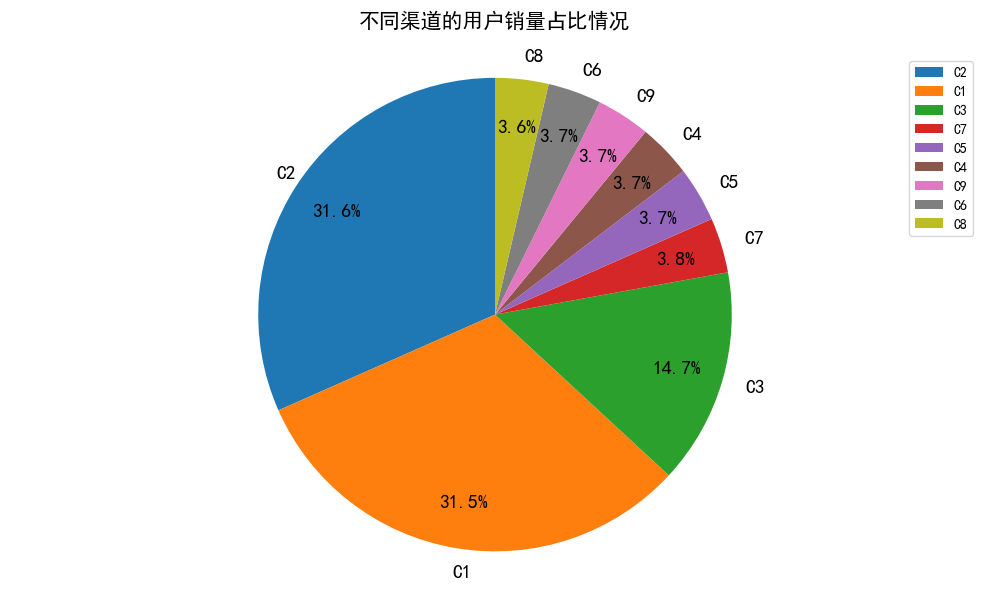

In [ ]:
Channel_df=df[['customer_channel','quantity']]
Channel_df1=Channel_df.groupby('customer_channel').sum().sort_values(by='quantity',ascending=False)
plt.figure(figsize=(10,6))
labels=Channel_df1.index
sizes=Channel_df1['quantity']
plt.pie(sizes,labels=labels,
        autopct=fmt,
        startangle=90,
        radius=0.2,
        center=(0.2,0.2),
        textprops={'fontsize':14,'color':'k'},
        pctdistance=0.8)
plt.axis('equal')   #设置x,y轴刻度一致，保证饼图为圆形
plt.title('不同渠道的用户销量占比情况',pad=20,fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

从饼图可以看出，C2和C1是销量最多的两个渠道，占比均超过了30%；C3渠道占比14.7%，不足C1和C2的一半；其余渠道销量占比较为均衡，在3.7%左右。
判断数据分布和预期是否相符，如果存在某一渠道的销量超过预期或低于预期，则需进一步分析原因

In [ ]:
# 周末与工作日销量对比
df['月份'],df['星期']=df['invoice_date'].dt.month,df['invoice_date'].dt.dayofweek
df.loc[df[df['星期']<5].index,'标记']='工作日'
df.loc[df[df['星期']>=5].index,'标记']='周末'
Week_df=df[['月份','quantity','标记']]
Week_df1=Week_df.groupby(['月份','标记']).mean().unstack()
print(Week_df1)

      quantity          
标记      周末    工作日
月份                    
1     2.965166  3.007676
2     2.946565  3.007765
3     3.011832  3.001086
4     2.959427  3.033754
5     3.023601  3.013311
6     2.999488  2.987913
7     2.945603  3.037003
8     2.982237  3.009546
9     2.995290  3.008820
10    3.025130  3.023207
11    2.988883  2.985494
12    2.990331  3.024147


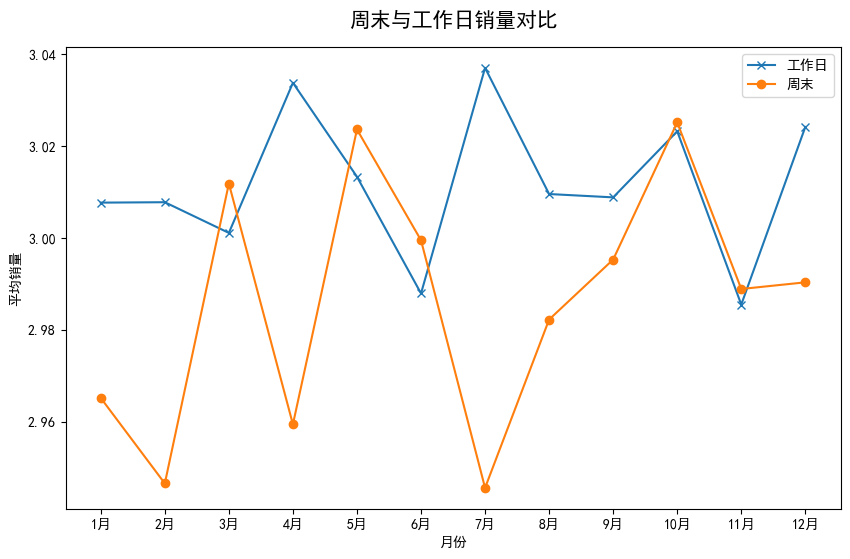

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, ax = plt.subplots(figsize=(10, 6))
Week_df1['quantity']['工作日'].plot(ax=ax, marker='x', label='工作日')
Week_df1['quantity']['周末'].plot(ax=ax, marker='o', label='周末')
plt.xticks(range(1, 13),labels=month)
plt.xlabel('月份',fontsize=10)
plt.ylabel('平均销量',fontsize=10)
plt.title('周末与工作日销量对比',fontsize=15,pad=15)
plt.legend()
plt.show()

折线图中展示了周末与工作日的平均销量对比。可以看出，工作日的销量普遍高于周末的销量，与常规思维不符，需要进一步分析原因，并制定适当的营销策略。

In [7]:
# RFM用户分层
# 1.计算每个用户的R、F、M值
rfm=df.groupby('customer_id').agg(
    Recency=('invoice_date',lambda x:(df['invoice_date'].max()-x.max()).days), #Recency
    Frequency=('invoice_date','nunique'),   #Frequency
    Monetary=('price',lambda x:(x*df.loc[x.index,'quantity']).sum())  #Monetary
    ).reset_index()
rfm.columns=['customer_id','Recency','Frequency','Monetary']
print(rfm.head())

  customer_id  Recency  Frequency  Monetary
0     C100004      467          1   7502.00
1     C100005        5          1   2400.68
2     C100006       97          1    322.56
3     C100012      570          1    130.75
4     C100019      591          1     35.84


In [8]:
rfm1=rfm[rfm['Frequency']>1]
print(rfm1)
# 由于此时的数据集中所有用户购买频次都是1，将其均视为新用户，下面根据Recency和Monetary两个指标进行用户分层

Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary]
Index: []


In [18]:
# 2.按价值对R和M打分
rfm['R_class']=np.where(rfm['Recency']<=90,'高','低')   #最近一次购买时间在90天内的用户为高价值用户
rfm['M_class']=np.where(rfm['Monetary']>=1000,'高','低')  #消费金额在1000元以上的用户为高价值用户
rfm['RFM_segment']=rfm['R_class'].str.cat(rfm['M_class'])
print(rfm.head())

  customer_id  Recency  Frequency  Monetary R_class M_class RFM_segment         Segment
0     C100004      467          1   7502.00      低      高        低高  高价值流失用户
1     C100005        5          1   2400.68      高      高        高高  高价值活跃用户
2     C100006       97          1    322.56      低      低        低低  低价值流失用户
3     C100012      570          1    130.75      低      低        低低  低价值流失用户
4     C100019      591          1     35.84      低      低        低低  低价值流失用户


In [ ]:
# 3.得到用户分层
segment_map={'高高':'高价值活跃用户','高低':'低价值活跃用户','低高':'高价值流失用户','低低':'低价值流失用户'}
rfm['Segment']=rfm['RFM_segment'].map(segment_map)
print(rfm.head())   
high_value_active = rfm[rfm['Segment'] == '高价值活跃用户']  #得到高价值活跃用户清单

  customer_id  Recency  Frequency  Monetary R_class M_class RFM_segment         Segment
0     C100004      467          1   7502.00      低      高        低高  高价值流失用户
1     C100005        5          1   2400.68      高      高        高高  高价值活跃用户
2     C100006       97          1    322.56      低      低        低低  低价值流失用户
3     C100012      570          1    130.75      低      低        低低  低价值流失用户
4     C100019      591          1     35.84      低      低        低低  低价值流失用户


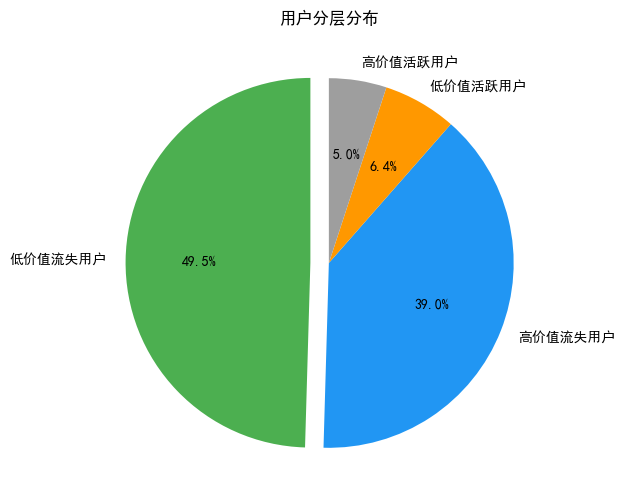

In [20]:
# 4.可视化分析
# 用户分布饼图
plt.figure(figsize=(10,6))
segment_dist=rfm['Segment'].value_counts()
plt.pie(segment_dist, 
        labels=segment_dist.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50','#2196F3','#FF9800','#9E9E9E'],
        explode=(0.1, 0, 0, 0))  # 突出显示最大占比群体
plt.title('用户分层分布')
plt.show()

可以看到，高价值活跃用户占到所有用户的5%，对这类用户要根据他们的购买历史和偏好，提供个性化的产品推荐；通过短信、邮件等方式定期与他们沟通，保持联系，提高他们的忠诚度。高价值流失客户占到所有用户的39%，对这类用户要通过促销活动、折扣券等方式重新激活他们的购买兴趣；进行客户满意度调查，了解他们不活跃的原因。低价值活跃用户占到所有用户的6.4%，对这类用户要通过捆绑销售、推荐高价值产品等方式提升他们的消费金额，提供一些可选择的增值服务，提升他们的购买体验。低价值流失用户占到所有用户的49.5%，对这类用户要推送大力度促销活动，提醒他们关注高性价比产品。

In [41]:
# 支付方式画像
# 1.支付方式与用户特征交叉分析
import seaborn as sns
pay_gender = pd.crosstab(df['payment_method'], df['gender'], normalize='index') * 100
pay_age = df.groupby('payment_method')['age'].mean().round(1)

# 2.得到各支付方式的性别分布
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.heatmap(pay_gender, annot=True, fmt=".1f", cmap="YlGnBu")
plt.ylabel('支付方式')
plt.xlabel('性别')
plt.title('支付方式性别分布(%)')

# 3.得到各支付方式用户平均年龄
plt.subplot(132)
sns.barplot(x=pay_age.index, y=pay_age.values, palette="Blues_d")
plt.title('各支付方式用户平均年龄')
plt.tight_layout()
plt.xlabel('支付方式')
plt.show()


UnboundLocalError: cannot access local variable 'date' where it is not associated with a value

C:\Users\Qin Wang\AppData\Local\Temp\ipykernel_1844\1745976199.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pay_unit_price = df.groupby('payment_method').apply(
C:\Users\Qin Wang\AppData\Local\Temp\ipykernel_1844\1745976199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_unit_price.index, y=pay_unit_price.values, palette="viridis")


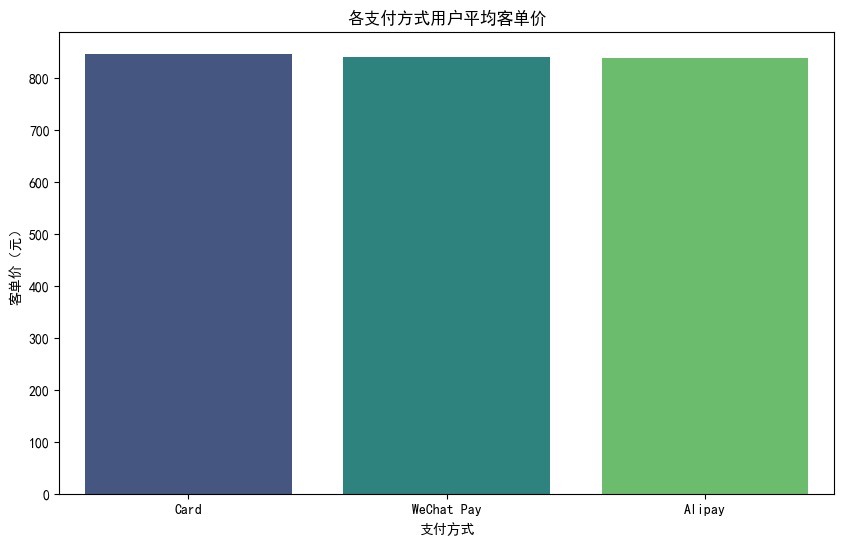

In [35]:
# 3.得到各支付方式平均客单价
pay_unit_price = df.groupby('payment_method').apply(
    lambda x: (x['price'] * x['quantity']).sum() / x['quantity'].sum()
).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=pay_unit_price.index, y=pay_unit_price.values, palette="viridis")
plt.ylabel('客单价（元）')
plt.title('各支付方式用户平均客单价')
plt.xlabel('支付方式')
plt.show()

可以看出，不管使用哪种支付方式，女性用户的数量普遍高于男性用户。不同性别用户在支付方式的选择上没有明显的偏好，女性用户选择Alipay支付的用户相较于其他方式较多，男性用户则更倾向于选择信用卡和微信支付。使用各支付方式的用户年龄均在40岁以上，平均客单价均在800元以上，可能是因为数据不够全面的原因，需要得到更加全面的数据，再进行平均年龄的分析。